In [69]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [70]:
df=pd.read_csv(r"C:\Users\91771\OneDrive\Desktop\everything\prodigy_infotech\archive\Mall_Customers.csv")

In [71]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [72]:
df.shape

(200, 5)

In [73]:
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [74]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [75]:
num_clusters = 10  # You can experiment with different values of k
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(X)


C:\Users\91771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [76]:
df['Cluster'] = kmeans.predict(X)


In [77]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
[[ 24.58333333   9.58333333]
 [ 80.375       82.9375    ]
 [ 66.61111111  39.66666667]
 [ 24.95        81.        ]
 [ 80.18181818  12.68181818]
 [ 28.18181818  33.27272727]
 [ 59.43243243  51.54054054]
 [109.7         22.        ]
 [114.71428571  78.42857143]
 [ 44.32258065  52.12903226]]


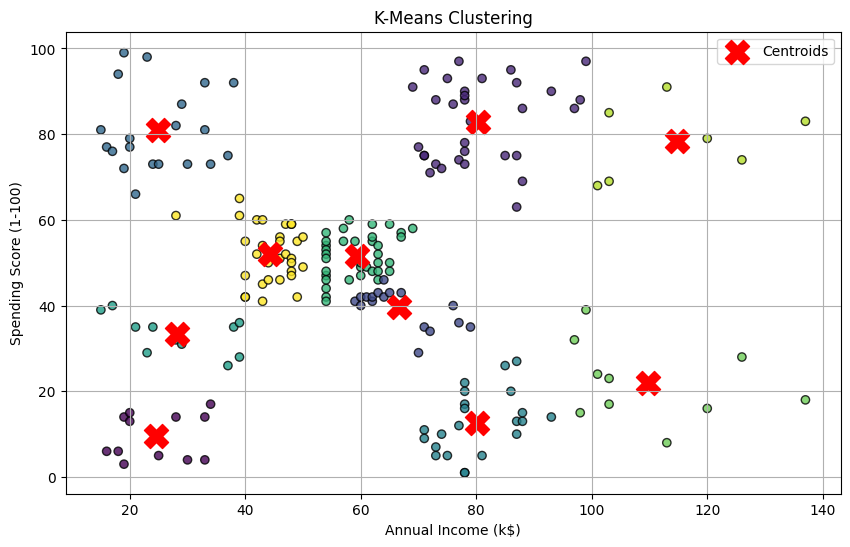

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', marker='o', edgecolors='k', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()